In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from keras.layers import LSTM
from pandas_datareader import data
from keras.layers import Dropout
import datetime

Using TensorFlow backend.


In [2]:
stock_name = 'MSFT'                   #stock code for microsoft
start_date = '01-01-1990'
end_date = '{}-{}-{}'.format(datetime.datetime.now().year,datetime.datetime.now().month,datetime.datetime.now().day)
data = data.DataReader(stock_name, 'yahoo', start_date, end_date)

In [3]:
x_train = data.iloc[:len(data)-80,[0,1,2,3,4,5]].values
x_test = data.iloc[len(data)-80:,[0,1,2,3,4,5]].values

In [4]:
scaler_train = StandardScaler().fit(x_train)
x_train = scaler_train.transform(x_train)

In [5]:
X_train = []
Y_train = []
for i in range(80,len(x_train)):
    X_train.append(x_train[i-80:i])
    Y_train.append(x_train[i][0])
Y_train = np.array(Y_train)
X_train = np.array(X_train)

In [6]:
model = Sequential()
model.add(LSTM(units = 200, return_sequences = True, input_shape = (80, 6))) #timestep and features
model.add(Dropout(0.2))
model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 25))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()
model.fit(X_train, Y_train, epochs = 100, batch_size = 32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 80, 200)           165600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 80, 200)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 80, 100)           120400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 80, 100)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 80, 50)            30200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 80, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 25)                7600      
__________

7230/7230 [==============================] - 89s 12ms/step - loss: 0.0121
Epoch 78/100
7230/7230 [==============================] - 81s 11ms/step - loss: 0.0130
Epoch 79/100
7230/7230 [==============================] - 88s 12ms/step - loss: 0.0118
Epoch 80/100
7230/7230 [==============================] - 77s 11ms/step - loss: 0.0147
Epoch 81/100
7230/7230 [==============================] - 77s 11ms/step - loss: 0.0141
Epoch 82/100
7230/7230 [==============================] - 75s 10ms/step - loss: 0.0118
Epoch 83/100
7230/7230 [==============================] - 87s 12ms/step - loss: 0.0130
Epoch 84/100
7230/7230 [==============================] - 82s 11ms/step - loss: 0.0131
Epoch 85/100
7230/7230 [==============================] - 81s 11ms/step - loss: 0.0125
Epoch 86/100
7230/7230 [==============================] - 79s 11ms/step - loss: 0.0129
Epoch 87/100
7230/7230 [==============================] - 80s 11ms/step - loss: 0.0131
Epoch 88/100
7230/7230 [==============================] 

In [7]:
X_test = []
Y_test = []
for i in range(len(x_train)-20,len(x_train)):
    X_test.append(x_train[i-80:i])
    Y_test.append(x_train[i][0])
actual_price_scaled = np.array(Y_test)
X_test = np.array(X_test)

In [8]:
prediction = model.predict(X_test)

In [10]:
predicted_stock_price = []
for i in prediction:
    predicted_stock_price.append(i[0])

In [12]:
predicted_stock_price = np.array(predicted_stock_price)

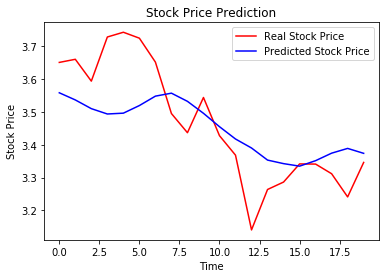

In [13]:
plt.plot(actual_price_scaled, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [15]:
predicted_stock_price = list(predicted_stock_price)
actual_price_scaled = list(actual_price_scaled)

In [17]:
predicted_stock_price

[3.5584757,
 3.5366771,
 3.5101302,
 3.4938364,
 3.4963796,
 3.5195873,
 3.5482624,
 3.5573146,
 3.5324063,
 3.495931,
 3.455146,
 3.4176269,
 3.390187,
 3.3533618,
 3.3425603,
 3.3348844,
 3.3515933,
 3.3744357,
 3.3889456,
 3.3739443]

In [20]:
from firebase import firebase  
firebase = firebase.FirebaseApplication('https://stockpricingprediction.firebaseio.com/', None)  
data =  { 
          stock_name:{
          'predicted_stock_price':'{}'.format(predicted_stock_price),  
          'actual_stock_price': '{}'.format(actual_price_scaled),
          }  
        }  
result = firebase.post('/stocks/',data)  
print(result) 

{'name': '-LdoaOp0TVgou15J3Wl3'}
